<h2 style="color:crimson">Ejercicios</h2>

En los ejercicios 1 a 5 analizaremos la volatilidad CEMEX (`"CEMEXCPO MF Equity"`).

1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
bmv = pd.read_csv("../files/lec02/ipc0019.csv")


In [2]:
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])

In [3]:
cemex_close_a = bmv["CEMEXCPO MF Equity"]
cemex_close = cemex_close_a["PX_LAST"]

In [4]:
cemex_close.index = pd.to_datetime(cemex_close.index)
cemex_close.head(12)

date
2000-01-03    8.14
2000-01-04    7.62
2000-01-05    7.61
2000-01-06    7.50
2000-01-07    7.58
2000-01-10    7.73
2000-01-11    7.58
2000-01-12    7.54
2000-01-13    7.57
2000-01-14    7.73
2000-01-17    7.85
2000-01-18    7.67
Name: PX_LAST, dtype: float64

In [5]:
cemex_diff = cemex_close - cemex_close.shift(1)
cemex_diff.head(12)

date
2000-01-03     NaN
2000-01-04   -0.52
2000-01-05   -0.01
2000-01-06   -0.11
2000-01-07    0.08
2000-01-10    0.15
2000-01-11   -0.15
2000-01-12   -0.04
2000-01-13    0.03
2000-01-14    0.16
2000-01-17    0.12
2000-01-18   -0.18
Name: PX_LAST, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


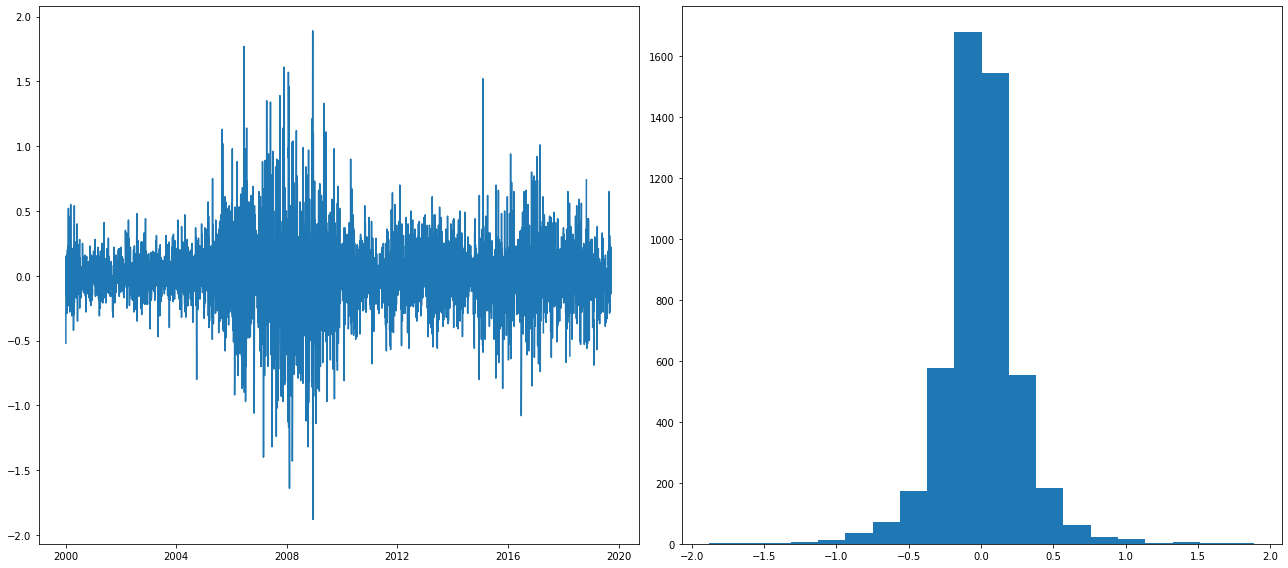

In [6]:
# Se genera una figura con 2 columnas en las que se grafica el hisórico de la diferencia de los precios 
# y el día siguiente y el histograma de esta misma diferencia.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
axes[0].plot(cemex_diff)
axes[1].hist(cemex_diff,bins=20)
fig.tight_layout()

----

2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`

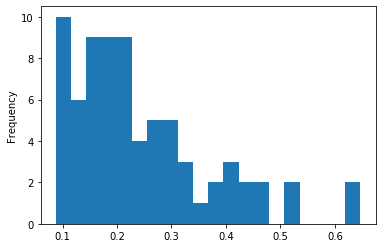

In [7]:
cemex_sample = cemex_diff.loc[ : "2018-06-01"]
cemex_std=cemex_sample.resample("Q",label='left', closed='left').std()
cemex_std.head(20)
cemex_std.plot.hist(bins=20)

---

3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana.



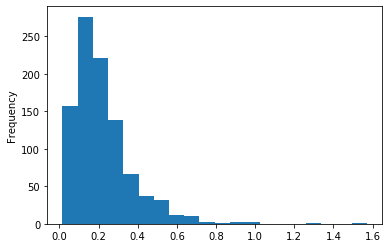

In [8]:
cemex_sample = cemex_diff.loc[ : "2018-06-01"]
cemex_std=cemex_sample.resample("W",label='left', closed='left').std()
cemex_std.head(20)
cemex_std.plot.hist(bins=20)

¿Qué diferencias observas entre las dos distribuciones de volatilidad?

En la primer gráfica que se tiene agrupación por trimestre se pierde información a diferencia de la agrupación por semana, donde se observa con más precisión la volatilidad.


---

4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

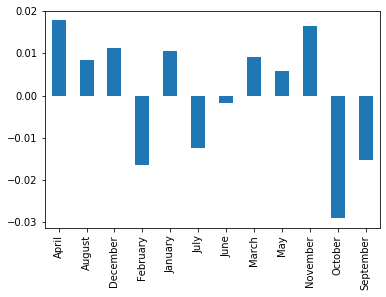

In [9]:
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")

El código define la variable `months` como los el nombre completo de los meses del año y después grafica agrupando los meses del año(`months`) y su promedio, esto es, grafica el promedio mensual de la diferencia de el precio que hay de un día y el siguiente.







¿Cómo podrías explicar la gráfica resultante?





La gráfica representa el promedio mensual de la volatilidad que hay en la diferencia de los precios entre un día y su consecutivo y donde se infiere que en febrero, julio, octubre y septiembre la volatilidad disminuye



---

5. Realiza nuevamente el ejercicio 4 considerando `cemexs_last`.

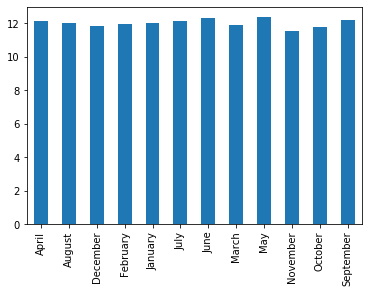

In [10]:
months = cemex_close.index.strftime("%B")
cemex_close.groupby(months).mean().plot(kind="bar")

¿Por qué difieren las gráficas?


La diferencia es que esta gráfica contiene el promedio mensual de los precios de cada día, mientras que la anterior muestra la media de de la volatilidad.